In [ ]:
# use cython compiled modules for faster execution
from scripts.cython.edgelistParser import edgelistParser
from scripts.cython.utils import list2matrix, getInOutDegree, transposeEdgelist, reorderEdgelist
#from scripts.cython.pageRank import approximateSimrank, localPageRank
from scripts.cython.plotNetwork import plotNetworkClusters

from scripts.cpp_libs.pageRankCpp import cppLocalPageRank as localPageRank

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import datetime

In [2]:
# load the Facebook dataset
A, N, original_idxs = edgelistParser("datasets/com-dblp.ungraph.txt", "list")
print(N)

317080


In [3]:
edges = 0
for n in A:
    for e in n:
        edges += 1
edges //= 2
print(edges)

1049866


In [4]:
#%timeit localPageRank(A, c=0.85, return_only_neighbours=True, epsilon=1e-2, max_iters=50)

In [5]:
# N=333, E=2519:       6.77 ms ± 516 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
# N=534, E=4813:       9.09 ms ± 603 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
# N=786, E=14024:      22.2 ms ± 2.56 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
# N=1034, E=26749:     30.8 ms ± 1.79 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
# N=4039, E=88234:     123 ms ± 1.88 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
# N=7115, E=103689:    228 ms ± 4.16 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
# N=12008, E=236994:   615 ms ± 2.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
# N=36692, E=367662:   3.52 s ± 110 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
# N=62586, E=147892:   7.39 s ± 551 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
# N=265214, E=419500:  1min 48s ± 496 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
# N=317080, E=1049866: 4min 16s ± 8.43 s per loop (mean ± std. dev. of 7 runs, 1 loop each)

In [3]:
Ns = np.array([333, 534, 786, 1034, 4039, 7115, 12008, 36692, 62586, 265214, 317080])
Es = np.array([2519, 4813, 14024, 26749, 88234, 103689, 236994, 367662, 147892, 419500, 1049866])
ts = np.array([6.77e-3, 9.09e-3, 22.2e-3, 30.8e-3, 123e-3, 228e-3, 615e-3, 3.52, 7.39, 108, 256])
es = np.array([516e-6, 603e-6, 2.56e-3, 1.79e-3, 1.88e-3, 4.16e-3, 2.1e-3, 110e-3, 551e-3, 496e-3, 8.43])

In [4]:
def timeOrder(x, c, e1, e2):
    return c*np.log(x[0,:])*np.power(x[0,:], e1)*np.power(np.log(x[1,:]), e2)

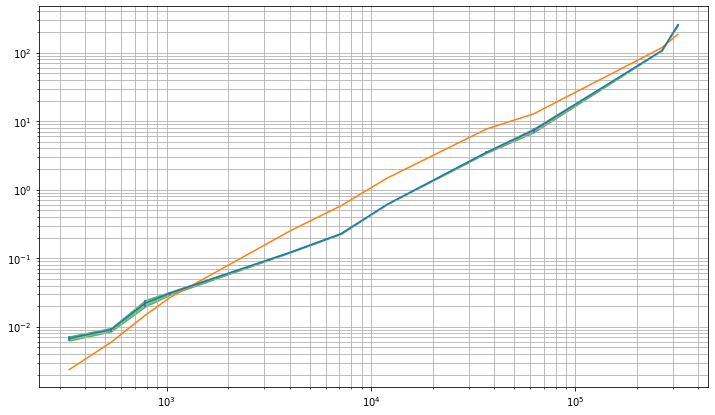

In [11]:
fig, axs = plt.subplots(1, 1, figsize=(12, 7))
#params, _ = curve_fit(timeOrder, [Ns, Es], ts, [8e-9, 1.28, 2], bounds=([0, 1, 1], [1, 2, 5]))
#print(params)
axs.errorbar(Ns, ts, es)
axs.plot(Ns, timeOrder(np.array([Ns, Es]), 5e-10, 1.28, 3))
plt.fill_between(Ns, ts-es, ts+es, alpha=.5, color='g')
axs.grid(True, which="both")
axs.set_yscale("log")
axs.set_xscale("log")